## Zadanie domowe -- Uczenie Głębokie -- Generator twarzy -- Gdańsk, 29.01.2023

Cel:
Opracować procedurę złożoną z przetwarzania wstępnego oraz klasyfikacji danych z wykorzystaniem sieci neuronowych typu CNN w celu uzyskania jak najlepszych wyników klasyfikacji dla zadanego zbioru danych.

-------------------------
------------------------------

Wykonawcy:
> **Krzysztof Walentukiewicz**

> **Aleksandra Gałka**

*Informatyka, II st., spec. uczenie maszynowe,  gr. 2*


#Preprocessing danych 
##Poniższe komórki wykonują się bardzo długo, dlatego polecanym jest załadowanie gotowego zbioru danych i rozpoczęcie wykonywania notatnika od rozdziału "Załadowanie przetworzonego zbioru danych".

In [ ]:
!pip install -q gwpy
!sudo pip install git+https://github.com/rcmalli/keras-vggface.git
!pip show keras-vggface
!pip install keras_applications
!sudo pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 KB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 35.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-z5_exwpk
  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-z5_exwpk
  Resolved https://github.com/rcmalli/keras-vggface.git to commit 719ad75625fe51436b9a9

##Pobieranie danych

In [ ]:
!wget "http://vis-www.cs.umass.edu/lfw/lfw-deepfunneled.tgz"

In [ ]:
%%capture
!mkdir -p lfw_df/raw
!tar xvf lfw-deepfunneled.tgz -C lfw_df/raw --strip-components=1

##Edycja skryptu, aby móc wykrywać twarze

In [ ]:
# with is like your try .. finally block in this case
with open("/usr/local/lib/python3.8/dist-packages/keras_vggface/models.py", 'r') as file:
    # read a list of lines into data
    data = file.readlines()

print(data[19])
# now change the 2nd line, note that you have to add a newline
data[19] = 'from keras.utils.layer_utils import get_source_inputs\n'

# and write everything back
with open("/usr/local/lib/python3.8/dist-packages/keras_vggface/models.py", 'w') as file:
  file.writelines( data )


from keras.engine.topology import get_source_inputs



In [ ]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras_vggface.vggface import VGGFace
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
import glob

In [ ]:
# load image from file
filename="/content/lfw_df/raw/AJ_Cook/AJ_Cook_0001.jpg"
pixels = plt.imread(filename)
plt.imshow(pixels)

##Funckja wykrywająca twarze

In [ ]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(64, 64)):
	# load image from file
	pixels = plt.imread(filename)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face).convert('L')
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

In [ ]:
!mkdir -p faces

##Wykrywanie i przetwarzanie danych

In [ ]:
folders=glob.glob("/content/lfw_df/raw/*")
print(folders)
folder_len=folders.__len__()
print(folder_len)

for folder_id,folder in enumerate(folders):
  try:
    filenames=glob.glob(f"{folder}/*")
    print(f"Przetwarzam folder {folder_id}/{folder_len}")
    for id,file in enumerate(filenames):
      filename_temp=file.split("/")[-1][:-4]
      filename=f"faces/{filename_temp}.png"
      print(filename)
      pixels = extract_face(file)
      Image.fromarray(pixels).save(filename)
  except:
    with open("logs.txt", 'a') as file:
      file.write(f"error in {folder}___{folder_id}\n")

### Pobranie potrzebnych bibliotek

In [ ]:
! pip install -q tensorflow==2.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 113.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 85.1 MB/s eta 0:00:00


In [ ]:
import keras
from keras import layers
from keras import backend as K
from keras.models import Model
import numpy as np
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, Callback
import tensorflow_datasets as tfds 
import tensorflow as tf; tf.compat.v1.disable_eager_execution()
import keras
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray
import glob
import os

tf.executing_eagerly()

False

### Podział zbioru danych na treningowy i testowy

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory="./faces/",
    labels=None,
    label_mode=None,
    batch_size=32,
    color_mode='grayscale',
    image_size=(64, 64),
    validation_split=0.1,
    subset="training",
    seed=123
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory="./faces/",
    labels=None,
    label_mode=None,
    batch_size=32,
    color_mode='grayscale',
    image_size=(64, 64),
    validation_split=0.1,
    subset="validation",
    seed=123
)


Found 13231 files belonging to 1 classes.
Using 11908 files for training.
Found 13231 files belonging to 1 classes.
Using 1323 files for validation.


### Zmiana reprezentacji danych oraz preprocessing

In [ ]:
train=tfds.as_numpy(train_ds) 
test=tfds.as_numpy(test_ds)

In [ ]:
train=list(train)
test=list(test)
x_train=[]
x_test=[]

In [ ]:
for batch in train:
  for el in batch:
    x_train.append(el)

In [ ]:
for batch in test:
  for el in batch:
    x_test.append(el)

In [ ]:
x_train=np.asarray(x_train)
x_test=np.asarray(x_test)


In [ ]:
x_train=x_train/255
x_test=x_test/255

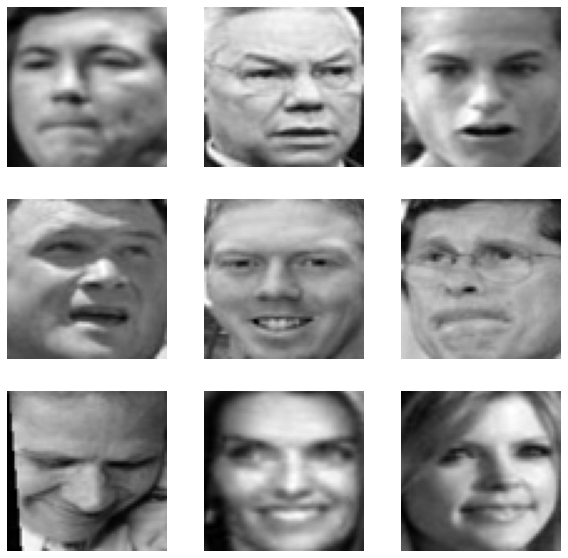

In [ ]:
plt.figure(figsize=(10, 10))
for i,images in enumerate(x_train[:9]):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images.reshape(64,64),cmap="gray")
    plt.axis("off")

## VAE

### Enkoder

In [ ]:
INPUT_DIM = (64, 64, 1)
BATCH_SIZE = 32
LATENT_DIM = 512

input_img = keras.Input(shape=INPUT_DIM)

x = layers.Conv2D(32, 3, activation='LeakyReLU')(input_img)
x = layers.Conv2D(64, 3, activation='LeakyReLU')(x)
x = layers.Conv2D(128, 3, activation='LeakyReLU')(x)
x = layers.MaxPool2D(2)(x)
x = layers.Conv2D(256, 3, activation='LeakyReLU')(x)
x = layers.MaxPool2D(3)(x)
x = layers.Conv2D(512, 3,dilation_rate=3,activation='LeakyReLU')(x)
x = layers.DepthwiseConv2D(3)(x)
shape_before_flattening = K.int_shape(x)
x = layers.Flatten()(x)

# Rozdzielenie do wektora wartości średnich oraz wariancji
z_mean = layers.Dense(LATENT_DIM)(x)
z_log_var = layers.Dense(LATENT_DIM)(x)

def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], LATENT_DIM),
                              mean=0., stddev=1.)
    return z_mean + K.exp(z_log_var) * epsilon

encoder_output = layers.Lambda(sampling, name='encoder_output')([z_mean, z_log_var])

encoder=Model(input_img,encoder_output)

In [ ]:
encoder.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 62, 62, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 60, 60, 64)   18496       ['conv2d[0][0]']                 
                                                                                                  
 conv2d_2 (Conv2D)              (None, 58, 58, 128)  73856       ['conv2d_1[0][0]']               
                                                                                              

### Dekoder

In [ ]:
decoder_input = layers.Input(shape=(LATENT_DIM,))
x = layers.Dense(np.prod(shape_before_flattening[1:]),
                 activation='LeakyReLU')(decoder_input)
x = layers.Reshape(shape_before_flattening[1:])(x)
x = layers.Conv2DTranspose(512, 3,
                           padding='same',
                           activation='LeakyReLU',
                           strides=(3))(x)
x = layers.Conv2DTranspose(256, 3,
                           padding='valid',
                           activation='LeakyReLU',
                           dilation_rate =3)(x)
x = layers.Conv2DTranspose(256, 3,
                           padding='valid',
                           activation='LeakyReLU',
                           strides = 3)(x)
x = layers.Conv2DTranspose(128, 3,
                           padding='valid',
                           activation='LeakyReLU',
                           )(x)
x = layers.Conv2DTranspose(128, 3,
                           padding='same',
                           activation='LeakyReLU',
                           strides = 2)(x)
x = layers.Conv2DTranspose(64, 3,
                           padding='valid',
                           activation='LeakyReLU',
                           )(x)
x = layers.Conv2DTranspose(32, 3,
                           padding='valid',
                           activation='LeakyReLU',
                           )(x)
x = layers.Conv2DTranspose(1, 3,
                  padding='valid',
                  activation='sigmoid')(x)

decoder = Model(decoder_input, x)

In [ ]:
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512)]             0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 reshape (Reshape)           (None, 1, 1, 512)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 3, 3, 512)        2359808   
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 9, 9, 256)        1179904   
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 27, 27, 256)      5900

### Złączenie kodera i dekodera

In [ ]:
vae = Model(input_img, decoder(encoder(input_img)))

In [ ]:
vae.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 model (Functional)          (None, 512)               2098432   
                                                                 
 model_1 (Functional)        (None, 64, 64, 1)         4927617   
                                                                 
Total params: 7,026,049
Trainable params: 7,026,049
Non-trainable params: 0
_________________________________________________________________


### Wybranie funkcji staty oraz optymalizatora

In [ ]:
!mkdir weights/

In [ ]:
!mkdir weights/VAE/

In [ ]:
WEIGHTS_FOLDER = './weights/'

In [ ]:
klstart = 10
kl_annealtime = 25
# Annealing Callback ma za zadanie zwiększać udział funkcji straty KL
# w ogólnej funkcji straty od 15 epoki, przez 30 epok, liniowo
class AnnealingCallback(Callback):
    def __init__(self, weight):
        self.weight = weight
    def on_epoch_end (self, epoch, logs={}):
        if epoch > klstart :
            new_weight = min(K.get_value(self.weight) + (1./ kl_annealtime), 1.)
            K.set_value(self.weight, new_weight)
        print ("Current KL Weight is " + str(K.get_value(self.weight)))


weight = K.variable(0.)
def vae_loss(weight):
    def loss (y_true, y_pred):
        # mse loss
        reconstruction_loss = K.sum(K.square(y_true - y_pred), axis=[1,2,3])
        # kl loss
        kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
        kl_loss = K.sum(kl_loss, axis=1)
        kl_loss *= -0.5
        return reconstruction_loss + (weight * kl_loss)
    return loss


In [ ]:
LEARNING_RATE = 0.0005
n_epochs = 100 

adam_optimizer = Adam(learning_rate = LEARNING_RATE)

vae.compile(optimizer=adam_optimizer, loss =vae_loss(weight),experimental_run_tf_function=False)

checkpoint_vae = ModelCheckpoint(os.path.join(WEIGHTS_FOLDER, 'VAE/weights.h5'), save_weights_only = True, verbose=1)
call_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, start_from_epoch=klstart+kl_annealtime+5)

In [ ]:
x_train.shape

(11908, 64, 64, 1)

### Trening modelu

In [ ]:
history=vae.fit(x=x_train,y=x_train,
                batch_size=32, epochs=n_epochs, 
                shuffle=True,validation_split=0.1,
                callbacks=[checkpoint_vae,  call_early_stopping, AnnealingCallback(weight)]) 

Train on 10717 samples, validate on 1191 samples
Epoch 1/100
10717/10717 [==============================] - ETA: 0s - loss: 85.1755

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates



Epoch 1: saving model to ./weights/VAE/weights.h5
Current KL Weight is 0.0
10717/10717 [==============================] - 52s 5ms/sample - loss: 85.1755 - val_loss: 54.1412
Epoch 2/100
10717/10717 [==============================] - ETA: 0s - loss: 40.7236
Epoch 2: saving model to ./weights/VAE/weights.h5
Current KL Weight is 0.0
10717/10717 [==============================] - 38s 4ms/sample - loss: 40.7236 - val_loss: 34.0205
Epoch 3/100
10717/10717 [==============================] - ETA: 0s - loss: 29.5524
Epoch 3: saving model to ./weights/VAE/weights.h5
Current KL Weight is 0.0
10717/10717 [==============================] - 37s 3ms/sample - loss: 29.5524 - val_loss: 27.2152
Epoch 4/100
10717/10717 [==============================] - ETA: 0s - loss: 24.4684
Epoch 4: saving model to ./weights/VAE/weights.h5
Current KL Weight is 0.0
10717/10717 [==============================] - 38s 4ms/sample - loss: 24.4684 - val_loss: 23.0619
Epoch 5/100
10717/10717 [==============================] -

### Wizualizacja funkcji straty i walidacja modelu na zbiorze testowym

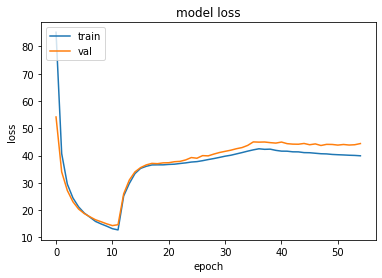

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
test_score=vae.evaluate(x=x_test,y=x_test)
print(test_score)

44.356400274275295


In [ ]:
test=vae.predict(np.expand_dims(x_test[0], axis=0))

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


### Generacja obrazów twarzy z przygotowanego zbioru testowego

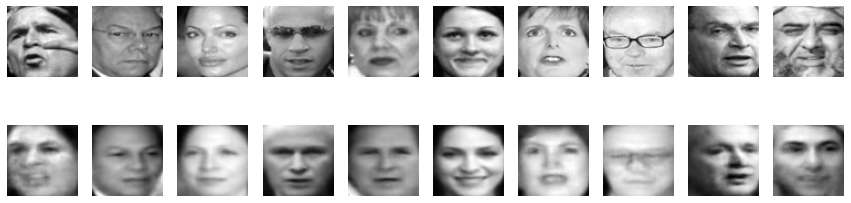

In [41]:
fig = plt.figure(figsize=(15, 4))
plt.set_cmap("gray")
fig.subplots_adjust(hspace=0.2, wspace=0.2)
n_to_show=10
test_img=x_test[:10]
reconst_images = vae.predict(test_img)

for i in range(n_to_show):
    img = test_img[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+1)
    sub.axis('off')        
    sub.imshow(img)

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    sub.axis('off')
    sub.imshow(img)  


### Generowanie twarzy z losowej wartości wektora cech

In [ ]:
# Jako latent_face_representation należy podać wektor cech rozmiaru (1,512)
latent_face_representation = np.random.normal(loc=0.0, scale=1.0, size=(1, 512))
generated_face = decoder.predict(latent_face_representation)

In [ ]:
generated_face.shape

(1, 64, 64, 1)

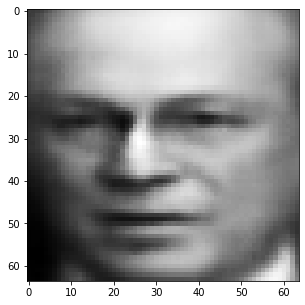

In [ ]:
plt.figure(figsize=(5, 5))
plt.imshow(generated_face.reshape(64,64),cmap='gray')